# **K-Means**

**K-Means** is a *unsupervised* machine learning algorithm used for *clustering* similar data points together. 

It aims to partition a dataset into 'k' distinct, non-overlapping clusters, where 'k' is a predefined number chosen by the user.

## **Context**

### **Instructions**



The following steps are required to complete the assignment:

- Initialize K means centroids
- Find the closest Centroids
- Compute Centroids means
- Run K means algorithm
- Plot each step of Kmeans as it processds

### **Dataset**



For this assignment, we will use the **Iris Dataset**. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The link to it can be found [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

**The targets** are the labels or classes associated with each iris flower. There are three classes or species of irises in this dataset:
- `Setosa`
- `Versicolour`
- `Virginica`

**The features** are measurements associated with each iris flower. The features in this dataset are:
- `Sepal Length`
- `Sepal Width`
- `Petal Length`
- `Petal Width`


## **Model Setup**

### **Environment**


Before we can get into analysis, we need to set up the environment with all the libraries and functions that we will need.

#### Import Libraries

In [1]:
# Imported Libraries
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.datasets import load_iris

#### Function Definitions

In [2]:
# K-Means class that implements the algorithm
class KMeansClass:
    
    def __init__(self, maxIterations = 100, clusterNum = 2):
        self.maxIterations = maxIterations
        self.clusterNum = clusterNum
        self.centroids = None
        self.iterationHistory = []

    def initializeCentroids(self, x):
        m = x.shape[0]

        indices = np.random.choice(m, self.clusterNum)
        return x[indices]

    def assignToCentroid(self, x):
        distances = np.sqrt(((x - self.centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin((distances), axis=0)

        return np.array(clusters)

    def updateCentroids(self, x, assignment):
        centroids = []
        m = x.shape[0]

        for i in range(self.clusterNum):
            assignments = x[assignment == i]

            if (len(assignments) > 0):
                centroids.append(sum(assignments) / len(assignments))
            else:
                centroids.append(x[np.random.choice(m)])

        return np.array(centroids)

    # Fits the model to the data
    def fit(self, x):
        m = x.shape[0]

        self.centroids = self.initializeCentroids(x)
        self.assignments = np.zeros(m)

        for _ in range(self.maxIterations):

            self.iterationHistory.append(self.centroids)

            prevAssignments = np.copy(self.assignments)
            self.assignments = self.assignToCentroid(x)
            self.centroids = self.updateCentroids(x, self.assignments)
            
            if (prevAssignments == self.assignments).all():
                break

        return self
    
# Encodes the categorical labels to numbers
def encode_labels(y : np.ndarray):
    dict = {}
    index = 0

    result = []

    for i in range(len(y)):
        if y[i] not in dict:
            dict[y[i]] = index
            index = index + 1
        result.append(dict[y[i]])

    return np.array(result)

### **Dataset Preparation**

Before we start using the dataset, we must first prepare it.

#### Column Preparation

In [3]:
# Initializes data
data = load_iris()
X = data.data
y = data.target

# Normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Encode the labels
y = encode_labels(y)

#### Visualizing the Data

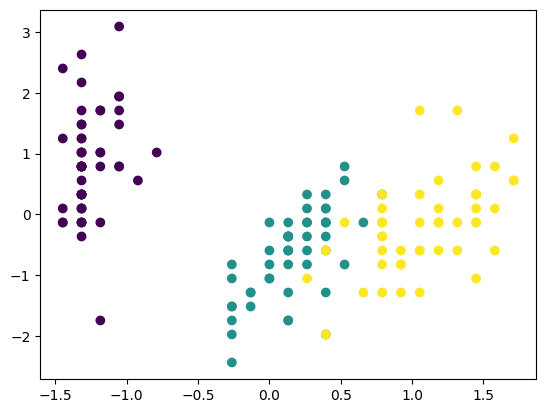

In [4]:
# Plot the data
plt.scatter(X[:, 3], X[:, 1], c=y, cmap='viridis')

## **Implementation**

### **Initializing K-Means Clustering**

In [5]:
# Fit the model
kMeansModel = KMeansClass(clusterNum=3)
kMeansModel.fit(X)

### **Clustering and Centroid Visualization**

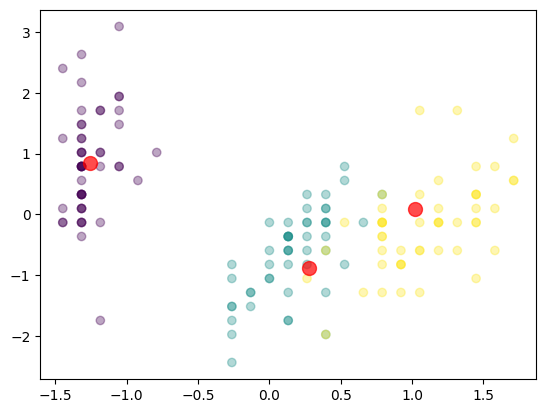

In [6]:
# Plot the centroids
centroids = kMeansModel.centroids
plt.scatter(X[:, 3], X[:, 1], c=y, cmap='viridis', alpha=0.35)
plt.scatter(centroids[:, 3], centroids[:, 1], c='red', s=100, alpha=0.7)

### **Visualizing K-Means Clustering Iterations**

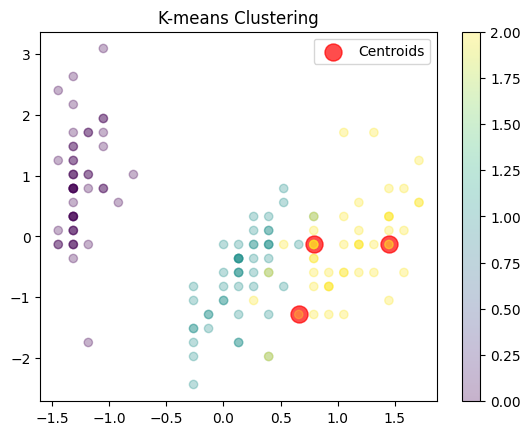

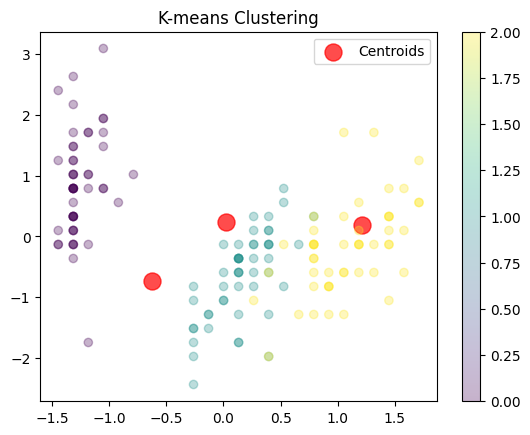

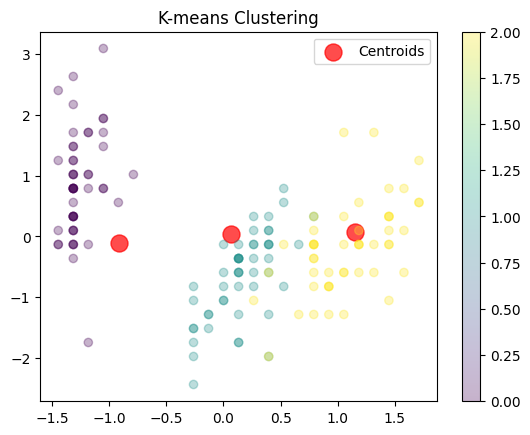

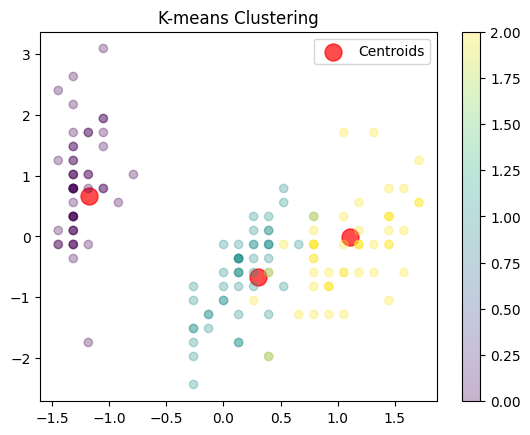

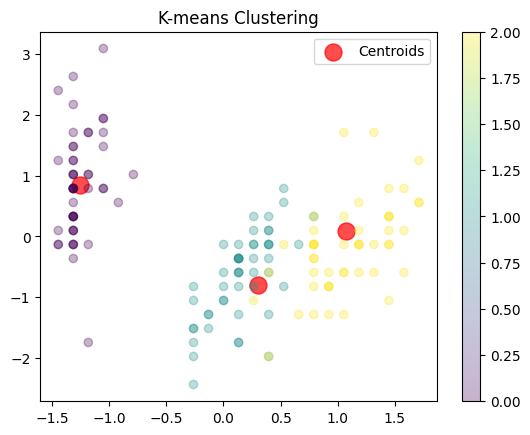

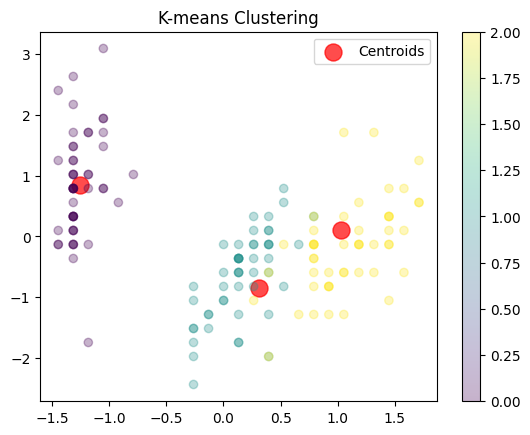

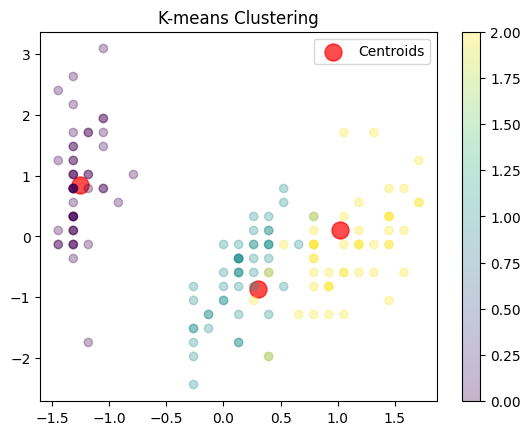

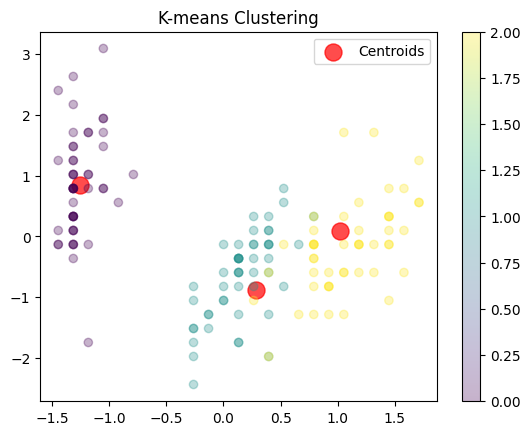

In [7]:
# Plotting each iteration
iteration = kMeansModel.iterationHistory

for i in range(len(iteration)):
    centroids = iteration[i]

    plt.scatter(centroids[:, 3], centroids[:, 1], c='red', s=150, label='Centroids', alpha=0.7)
    data_scatter = plt.scatter(X[:, 3], X[:, 1], c=y, cmap='viridis', alpha=0.3)
    cbar = plt.colorbar(data_scatter)
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()
